In [1]:
# https://www.dataquest.io/blog/numpy-tutorial-python/

import csv
with open('../data/winequality-red.csv','r') as f:
    wines = list(csv.reader(f,delimiter = ';'))
    print (wines[:3])
    qualities = [float(item[-1]) for item in wines[1:]]
    print (sum(qualities)/len(qualities))
    

[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'], ['7.4', '0.7', '0', '1.9', '0.076', '11', '34', '0.9978', '3.51', '0.56', '9.4', '5'], ['7.8', '0.88', '0', '2.6', '0.098', '25', '67', '0.9968', '3.2', '0.68', '9.8', '5']]
5.6360225140712945


In [2]:
import numpy as np
wines = np.array(wines[1:],dtype=float)
print (wines)
print ((wines[:,-1]).sum() / wines.shape[0])

[[  7.4     0.7     0.    ...,   0.56    9.4     5.   ]
 [  7.8     0.88    0.    ...,   0.68    9.8     5.   ]
 [  7.8     0.76    0.04  ...,   0.65    9.8     5.   ]
 ..., 
 [  6.3     0.51    0.13  ...,   0.75   11.      6.   ]
 [  5.9     0.645   0.12  ...,   0.71   10.2     5.   ]
 [  6.      0.31    0.47  ...,   0.66   11.      6.   ]]
5.63602251407


In [5]:
zeros = np.zeros((3,4))
print(zeros)

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


In [8]:
rand= np.random.rand(3,4)
rand

array([[ 0.16953765,  0.50614344,  0.75056705,  0.30604081],
       [ 0.68429966,  0.87927417,  0.08919387,  0.56088035],
       [ 0.48317606,  0.9043536 ,  0.35975489,  0.12550182]])

In [10]:
wines = np.genfromtxt('../data/winequality-red.csv',delimiter = ';',skip_header = 1)  # Automatically picks data type
wines.shape

(1599, 12)

In [29]:
wines[2,3]

#Slicing
third_wine = wines[3,:]
print(third_wine)
third_wine[2]
newArr = np.reshape(third_wine,(wines.shape[1],1)) # Converted to 2-D
print (newArr.shape)



[ 11.2     0.28    0.56    1.9     0.075  17.     60.      0.998   3.16
   0.58    9.8     6.   ]
(12, 1)


In [31]:
ran = np.random.rand(4)
ran
ran.dtype


dtype('float64')

In [33]:
int_wine = wines.astype(int)

In [37]:
print(third_wine + 10)


[ 21.2    10.28   10.56   11.9    10.075  27.     70.     10.998  13.16
  10.58   19.8    16.   ]


In [43]:
# Broadcasting

ones = np.ones((2,2))
arr = np.random.rand(2)
print(ones)
print(arr)
print(ones + arr) # Broadcast across each row



[[ 1.  1.]
 [ 1.  1.]]
[ 0.09109002  0.16957797]
[[ 1.09109002  1.16957797]
 [ 1.09109002  1.16957797]]


## sum mean max min std ( standard deviation ) 




In [50]:
print( ' Third row sum = ',third_wine.sum())
print( ' Sum axis = 0 ',wines.sum(axis=0))
print( ' Sum axis = 1 ',wines.sum(axis=1))
print( ' Shape axis = 0 ',wines.sum(axis=0).shape)
print( ' Shape axis = 1 ',wines.sum(axis=1).shape)

 Third row sum =  111.553
 Sum axis = 0  [ 13303.1        843.985      433.29      4059.55       139.859    25384.
  74302.        1593.79794   5294.47      1052.38     16666.35      9012.     ]
 Sum axis = 1  [  74.5438   123.0548    99.699   ...,  100.48174  105.21547   92.49249]
 Shape axis = 0  (12,)
 Shape axis = 1  (1599,)


In [60]:
wines[3,:] > 5

# Subsetting - > Select row where value of column index 6 > val(20)

setting = wines[:,5] > 20
print(setting)
print(wines[setting,:][:3,])

high_quality_and_alcohol = (wines[:,10] > 10) & (wines[:,11] > 7)
wines[high_quality_and_alcohol,10:]

[False  True False ...,  True  True False]
[[  7.80000000e+00   8.80000000e-01   0.00000000e+00   2.60000000e+00
    9.80000000e-02   2.50000000e+01   6.70000000e+01   9.96800000e-01
    3.20000000e+00   6.80000000e-01   9.80000000e+00   5.00000000e+00]
 [  8.90000000e+00   6.20000000e-01   1.80000000e-01   3.80000000e+00
    1.76000000e-01   5.20000000e+01   1.45000000e+02   9.98600000e-01
    3.16000000e+00   8.80000000e-01   9.20000000e+00   5.00000000e+00]
 [  8.90000000e+00   6.20000000e-01   1.90000000e-01   3.90000000e+00
    1.70000000e-01   5.10000000e+01   1.48000000e+02   9.98600000e-01
    3.17000000e+00   9.30000000e-01   9.20000000e+00   5.00000000e+00]]


array([[ 12.8,   8. ],
       [ 12.6,   8. ],
       [ 12.9,   8. ],
       [ 13.4,   8. ],
       [ 11.7,   8. ],
       [ 11. ,   8. ],
       [ 11. ,   8. ],
       [ 14. ,   8. ],
       [ 12.7,   8. ],
       [ 12.5,   8. ],
       [ 11.8,   8. ],
       [ 13.1,   8. ],
       [ 11.7,   8. ],
       [ 14. ,   8. ],
       [ 11.3,   8. ],
       [ 11.4,   8. ]])

In [66]:
print(np.transpose(wines))
print('\n\n Same as \n\n')
print(wines.T)



[[  7.4     7.8     7.8   ...,   6.3     5.9     6.   ]
 [  0.7     0.88    0.76  ...,   0.51    0.645   0.31 ]
 [  0.      0.      0.04  ...,   0.13    0.12    0.47 ]
 ..., 
 [  0.56    0.68    0.65  ...,   0.75    0.71    0.66 ]
 [  9.4     9.8     9.8   ...,  11.     10.2    11.   ]
 [  5.      5.      5.    ...,   6.      5.      6.   ]]


 Same as 


[[  7.4     7.8     7.8   ...,   6.3     5.9     6.   ]
 [  0.7     0.88    0.76  ...,   0.51    0.645   0.31 ]
 [  0.      0.      0.04  ...,   0.13    0.12    0.47 ]
 ..., 
 [  0.56    0.68    0.65  ...,   0.75    0.71    0.66 ]
 [  9.4     9.8     9.8   ...,  11.     10.2    11.   ]
 [  5.      5.      5.    ...,   6.      5.      6.   ]]


In [69]:
wines.ravel() # Convert to 1-D

array([  7.4 ,   0.7 ,   0.  , ...,   0.66,  11.  ,   6.  ])

In [73]:
white_wines = np.genfromtxt('../data/winequality-white.csv',delimiter = ';',skip_header=1)
white_wines.shape

(4898, 12)

In [77]:
# Joining

all_wines = np.vstack((wines,white_wines))
all_wines
all_wines.shape

# hstack -> No of rows remain constant

(6497, 12)

In [79]:
# concatenate
# axis = 0 v-stack
# axis = 1 h-stack

np.concatenate((wines,white_wines),axis = 0)

array([[  7.4 ,   0.7 ,   0.  , ...,   0.56,   9.4 ,   5.  ],
       [  7.8 ,   0.88,   0.  , ...,   0.68,   9.8 ,   5.  ],
       [  7.8 ,   0.76,   0.04, ...,   0.65,   9.8 ,   5.  ],
       ..., 
       [  6.5 ,   0.24,   0.19, ...,   0.46,   9.4 ,   6.  ],
       [  5.5 ,   0.29,   0.3 , ...,   0.38,  12.8 ,   7.  ],
       [  6.  ,   0.21,   0.38, ...,   0.32,  11.8 ,   6.  ]])

In [81]:
np.full((2,2),7)

array([[7, 7],
       [7, 7]])

In [85]:
np.eye(4)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [105]:
import imageio as im
img = im.imread('../data/work.jpg')
print(img.dtype, img.shape)
tinted_img = img * [1,0.95,0.9]
im.imsave('../data/tinted_work.jpg',tinted_img)
gray_scale = img[:,:,0]
im.imsave('../data/gray_work.jpg',gray_scale)

uint8 (4096, 2304, 3)


/home/godfather/anaconda3/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [0.0, 254.0]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))


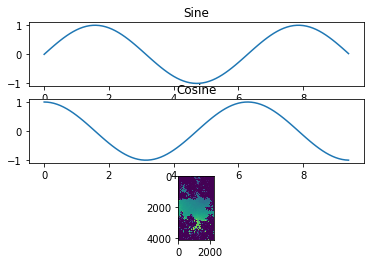

In [106]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 3 and width 1,
# and set the first such subplot as active.
plt.subplot(3, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(3, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Set image
plt.subplot(3,1,3)
plt.imshow(gray_scale)

# Show the figure.
plt.show()